<a href="https://colab.research.google.com/github/DangerDR0519/NeuralNetworks/blob/main/ICP-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Set image dimensions for CIFAR-10 (32x32 pixels, 3 channels)
image_height = 32
image_width = 32
num_channels = 3

# Define the model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_height, image_width, num_channels)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Load dataset (CIFAR-10 as an example)
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 472s 604ms/step - accuracy: 0.7529 - loss: 0.7059 - val_accuracy: 0.7328 - val_loss: 0.7748
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 488s 587ms/step - accuracy: 0.7715 - loss: 0.6545 - val_accuracy: 0.7605 - val_loss: 0.6980
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 536s 630ms/step - accuracy: 0.7832 - loss: 0.6112 - val_accuracy: 0.7763 - val_loss: 0.6638
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 483s 617ms/step - accuracy: 0.7987 - loss: 0.5718 - val_accuracy: 0.7790 - val_loss: 0.6407
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 483s 593ms/step - accuracy: 0.8138 - loss: 0.5342 - val_accuracy: 0.7747 - val_loss: 0.6687


In [5]:
# Evaluate model performance
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.7773 - loss: 0.6670
Test accuracy: 0.7746999859809875


In [7]:
# Predict first 4 test images
import numpy as np
predictions = model.predict(test_images[:4])

# Convert predictions to class labels
predicted_classes = [np.argmax(pred) for pred in predictions]
actual_classes = [np.argmax(label) for label in test_labels[:4]]

print(f'Predicted labels: {predicted_classes}')
print(f'Actual labels: {actual_classes}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted labels: [3, 8, 8, 0]
Actual labels: [3, 8, 8, 0]


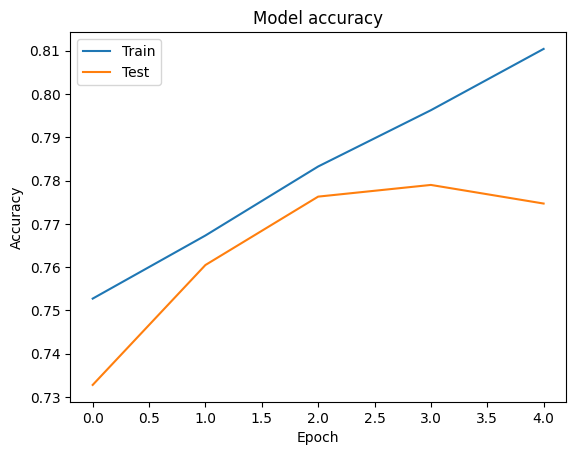

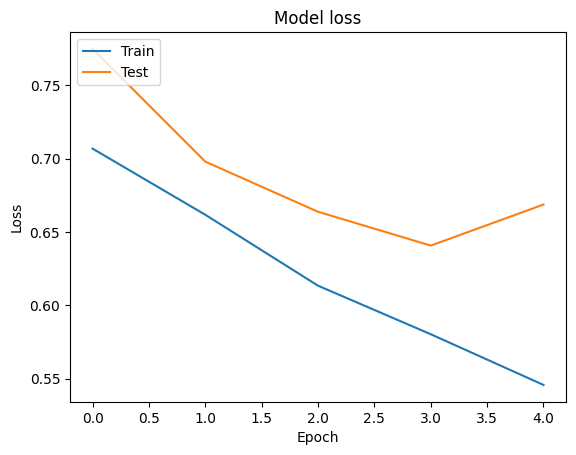

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()